# Exercise 1: Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Plotting the data

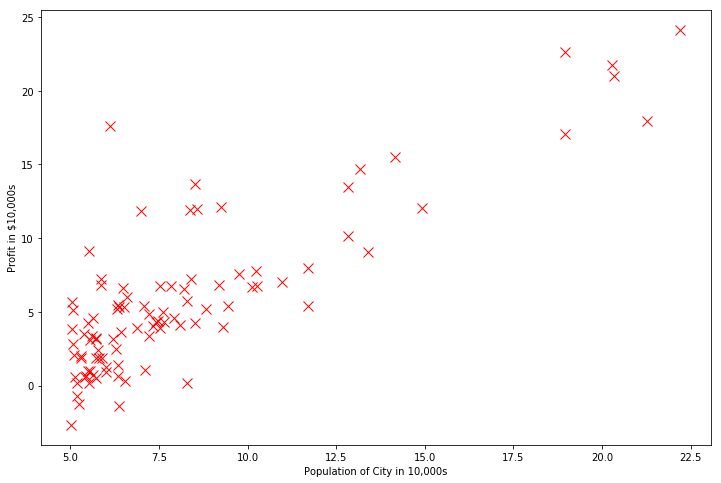

In [2]:
x, y = np.loadtxt('data/ex1data1.txt', delimiter=',', usecols=(0, 1), unpack=True)
plt.figure(figsize=(12,8))
plt.plot(x, y, 'rx', markersize=10)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

## 2. Gradient Descent

In [3]:
m = y.shape
# obtain number of training samples
m = m[0]
x = np.array([x])
# use hstack to concatenate to column vector-like arrays, obtain a 2-column matrix
X = np.hstack((np.ones((m, 1)), x.T))

# Cost computing function
def compute_cost(X, Y, theta):
    J = 0
    # H = theta(0) + theta(1)*x(1) + theta(2)*x(2)...
    H = np.dot(X, theta)

    # Handy way to obtain the squares
    J = np.dot((H - Y).T, (H - Y))
    J = J / (2 * m)
    return float(J)

Y = np.array([y]).T
theta = np.zeros((2, 1))
print "Cost with theta = [0, 0]:", compute_cost(X, Y, theta)

Cost with theta = [0, 0]: 32.0727338775
